
# image processing using Python PIL
"Python Image Library"


## An image


An image may be defined as a two-dimensional function f(x,y), where x and y are spatial coordinates, and the value of f at any pair of coordinates (x,y) is called the intensity of the image at that point. For a gray-range image, the intensity is given by just one value (one channel). For color images, the intensity is a 3D vector (three channels), usually distributed in the order RGB.

An image may be regarded as continuous with respect to x and y, and also in intensity (analog image). Or as a discrete function defined on a discrete domain (digital image). Both viewpoints are useful for image processing.

Converting an analog image to digital form requires both the coordinates and the intensity to be digitized. Digitizing the coordinates is called sampling, while digitizing the intensity is referred to as quantization. Thus, when all this quantities are discrete, we call the image a digital image.

The opposite operation, converting from digital to analog, is also possible and called interpolation.

## Coordinate conventions

The result of sampling and quantization is a matrix of real numbers. The size of the image is the number of rows by the number of columns,  M×N . The indexation of the image in Python follows the usual convention:

![title](img/matrix.png)

In [18]:
# importing libraries
from PIL import Image             # Python Imaging Library
import numpy as np                # Numerical Python 
import matplotlib.pyplot as plt   # Python plotting
%matplotlib inline
#For showing plots in the notebook. Don't use it in Python CLI scripts
2+1

3

## Reading, displaying and writing images
__Linus Torvalds says:
“Talk is cheap. Show me the code.”__

In [19]:
# Python supports most usual image formats. Let us load an image

I = Image.open(r'./1.jpeg')
type(I)

PIL.JpegImagePlugin.JpegImageFile

The usual data type of an image is uint8, i.e. 8-bit unsigned integer. This gives 
2**8=256  intensity values, which are distributed in the interval  [0,255].
We'll comment on data types later on.

The variable "I" is not a matrix, but an object (an instance of the class image).
There are many attributes and methods defined for this class. We review the
essentials in what follows.

For plotting the image:

In [20]:
I.show()  # Anoying right? why?

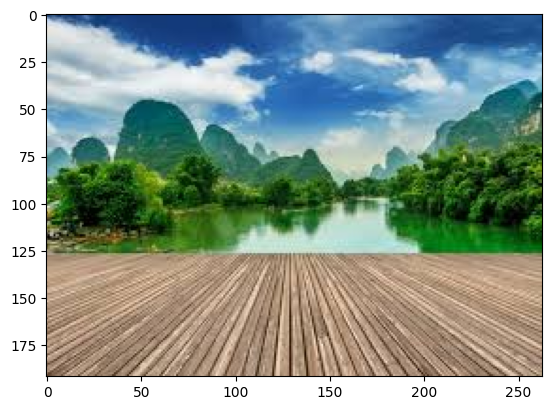

In [21]:
plt.imshow(np.asarray(I))
plt.show()     # A lot better! however it only opens arrays

For getting image information, such as size, type, and format:

In [22]:
print (I.size, I.mode, I.format)

(263, 192) RGB JPEG


In [23]:
# or much simplier !

I.size, I.mode, I.format

((263, 192), 'RGB', 'JPEG')

For converting to other modes, in this case to a gray scale or binary images:

L (263, 192) None


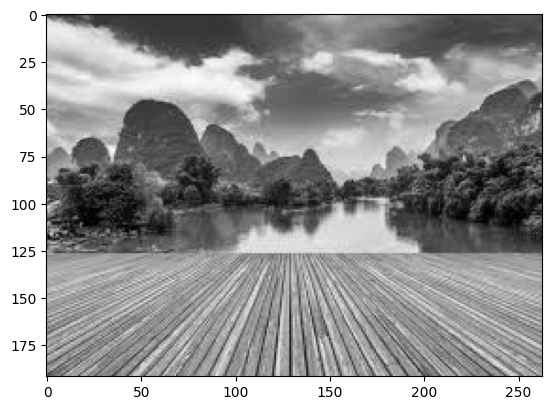

In [24]:
I1 = I.convert('L') # 'L' for gray scale mode (escala de grises)
I1.save(r'./1_gray.jpg', format = 'jpeg')
print(I1.mode, I1.size, I1.format)
plt.imshow(np.asarray(I1), cmap='gray')
plt.show()

1 (263, 192) None


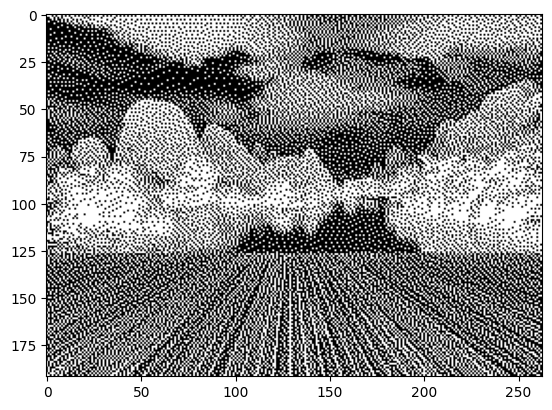

In [26]:
#??I.convert
I2 = I.convert('1')  # '1' for Binary image, only black and withe 
I2.save('img/1_BW.png', format = 'png')
print(I2.mode, I2.size, I2.format)
plt.imshow(np.asarray(I2), cmap='binary')
plt.show()

## Image types and coversions

There are three main types of images:

Intensity image is a data matrix whose values have been scaled to represent intensities.

When the elements of an intensity image are of class uint8 or class uint16, they have
integer values in the range [0,255] and [0,65535] respectively.

If the image is of class float32, the values are single-precission floating-point
numbers (RGB).

They are usually scaled in the range [0,1], although it is not rare to use the
scale [0,255] as well (P).

Binary image is a black and white image. Each pixel has one logical value, 0  or  1 (L).

Color image is like intensity image but with three chanels, i.e. to each pixel
corresponds three intensity values (RGB) instead of one.

When performing mathematical transformations of images we often need the image
to be of double type. But when reading and writing we save space by using integer
codification.

Let us see an example

In [27]:
# We convert the image into a double precision numpy array

a = np.asarray(I1,dtype=np.float64)
type(I1)

PIL.Image.Image

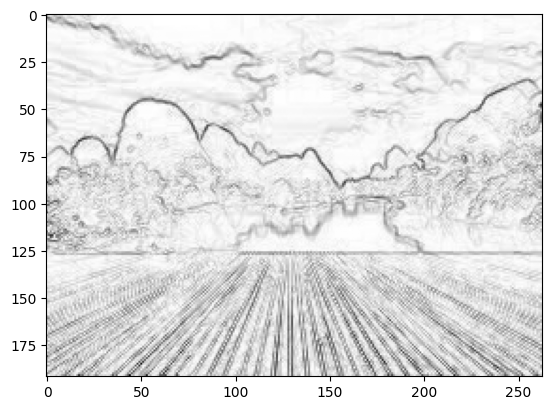

In [28]:
# Now, we can work and transform it. For instance "detect the edges"

a1 = - np.sqrt(np.gradient(a)[0]**2+np.gradient(a)[1]**2)
plt.imshow(a1,cmap='gray')  # Remember plt is able to show arrays not image objects
plt.show()

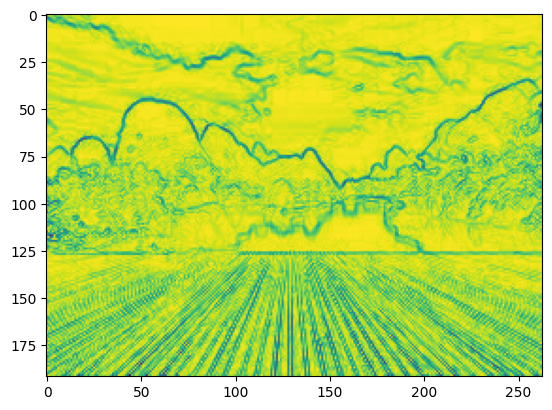

In [29]:
# As the (uint8) matrix range values between [0,255],
# we must fit again the values into this range with a linear transformation:

a2 = (a1-np.min(a1))/(np.max(a1)-np.min(a1))*255
a3 = a2.astype(np.uint8)

#Now it is ready to convert back to 8 bit image and save it
Im = Image.fromarray(a3)
Im.save("img/edges.jpg")
plt.imshow(Im)
plt.show()
#type(a3)

## Kernels & Filtering
![title](img/kernels.png)


In [30]:
# importing libraries
from PIL import Image, ImageFilter
myimg = Image.open('1.jpeg')
# applying the Kernel filter 
im2 = myimg.filter(ImageFilter.Kernel((3, 3), 
      (1,2,1,2,8,2,1,2,1), 1, 0))
  
im2 = im2.show()

__References__

Fredrik Lundh, Matthew Ellis, 2002. Python Imaging Library Overview

___Readings___

https://datacarpentry.org/image-processing/02-image-basics/index.html

https://www.codingame.com/playgrounds/2524/basic-image-manipulation/filtering

Leer procesamiento digital de señales